In [63]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm

#visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#hipothesis testing
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#misc
import pickle as pkl
import datetime as dt

## 1. EDA

In [6]:
df = pd.read_csv("./data/ten_years_of_earthquakes_TW.csv")
df.head(10)

,number,date,longitude_e,latitude_n,magnitude,depth,location,loc_full,loc_name
0,085,2023-12-31 05:57:10,121.839,24.6018,4.6,49.3,24.60N 121.84E,i.e. 16.3 km SSE of Yilan County(24.60N 121.84E,i.e. 16.3 km SSE of Yilan County)
1,Small area,2023-12-26 08:21:57,121.491,23.0357,3.7,26.6,23.04N 121.49E,i.e. 46.7 km NE of Taitung County(23.04N 121.49E,i.e. 46.7 km NE of Taitung County)
2,Small area,2023-12-26 06:19:24,121.755,24.3803,3.0,6.3,24.38N 121.76E,i.e. 38.8 km S of Yilan County(24.38N 121.76E,i.e. 38.8 km S of Yilan County)
3,Small area,2023-12-25 19:04:24,121.184,23.1407,3.4,14.5,23.14N 121.18E,i.e. 42.8 km N of Taitung County(23.14N 121.18E,i.e. 42.8 km N of Taitung County)
4,Small area,2023-12-25 11:49:35,121.919,24.4283,3.8,29.9,24.43N 121.92E,i.e. 37.1 km SSE of Yilan County(24.43N 121.92E,i.e. 37.1 km SSE of Yilan County)
5,Small area,2023-12-24 17:19:17,121.323,22.6363,4.4,21.0,22.64N 121.32E,i.e. 22.0 km SE of Taitung County(22.64N 121.32E,i.e. 22.0 km SE of Taitung County)
6,Small area,2023-12-24 05:21:18,121.308,22.6452,4.6,19.2,22.65N 121.31E,i.e. 20.2 km SE of Taitung County(22.65N 121.31E,i.e. 20.2 km SE of Taitung County)
7,Small area,2023-12-24 05:07:51,121.303,22.6458,4.5,19.0,22.65N 121.30E,i.e. 19.8 km SE of Taitung County(22.65N 121.30E,i.e. 19.8 km SE of Taitung County)
8,Small area,2023-12-23 10:32:34,122.141,24.2717,4.7,55.1,24.27N 122.14E,i.e. 61.4 km ENE of Hualien County(24.27N 122...,i.e. 61.4 km ENE of Hualien County)
9,Small area,2023-12-22 18:09:31,120.923,23.7777,3.6,28.1,23.78N 120.92E,i.e. 27.5 km ESE of Nantou County(23.78N 120.92E,i.e. 27.5 km ESE of Nantou County)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       6543 non-null   object 
 1   date         6543 non-null   object 
 2   longitude_e  6543 non-null   float64
 3   latitude_n   6543 non-null   float64
 4   magnitude    6543 non-null   float64
 5   depth        6543 non-null   float64
 6   location     6543 non-null   object 
 7   loc_full     6543 non-null   object 
 8   loc_name     6543 non-null   object 
dtypes: float64(4), object(5)
memory usage: 460.2+ KB


In [8]:
df.date = pd.to_datetime(df.date)

In [9]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name
df['day'] = df.date.dt.day_name
df['hour'] = df.date.dt.hour


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   number       6543 non-null   object        
 1   date         6543 non-null   datetime64[ns]
 2   longitude_e  6543 non-null   float64       
 3   latitude_n   6543 non-null   float64       
 4   magnitude    6543 non-null   float64       
 5   depth        6543 non-null   float64       
 6   location     6543 non-null   object        
 7   loc_full     6543 non-null   object        
 8   loc_name     6543 non-null   object        
 9   year         6543 non-null   int32         
 10  month        6543 non-null   object        
 11  day          6543 non-null   object        
 12  hour         6543 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(6)
memory usage: 613.5+ KB


In [11]:
df.describe()

,date,longitude_e,latitude_n,magnitude,depth,year,hour
count,6543,6543.000000,6543.000000,6543.000000,6543.000000,6543.000000,6543.000000
mean,2018-04-18 20:37:33.409903872,121.412451,23.768137,3.706144,19.335672,2017.829742,11.431148
min,2013-01-01 03:00:53,118.520000,19.299500,1.300000,0.600000,2013.000000,0.000000
25%,2015-09-16 04:11:44,121.146500,23.260000,3.200000,8.500000,2015.000000,5.000000
50%,2018-02-07 09:42:35,121.503000,23.920000,3.600000,13.500000,2018.000000,11.000000
75%,2021-05-14 08:20:48,121.730000,24.260000,4.100000,21.600000,2021.000000,18.000000
max,2023-12-31 05:57:10,125.583000,25.986200,6.900000,268.600000,2023.000000,23.000000
std,NaN,0.523019,0.677398,0.745917,20.526199,3.182667,7.063549


### 1.1 Outliers and duplicates

In [12]:
df['area']=df['number']

df.loc[df['number']=='Small area','area'] = 'Small area'
df.loc[df['number']!='Small area','area'] = 'Big area'

In [13]:
print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))


There have been 5290 Big Area earthquakes and 1253 Small Area earthquakes


/tmp/ipykernel_24143/1341892471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))
/tmp/ipykernel_24143/1341892471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There have been {} Big Area earthquakes and {} Small Area earthquakes'.format(df['area'].value_counts()[0],df['area'].value_counts()[1]))


First I'm going to plot all the registered earthquakes in the dataset.

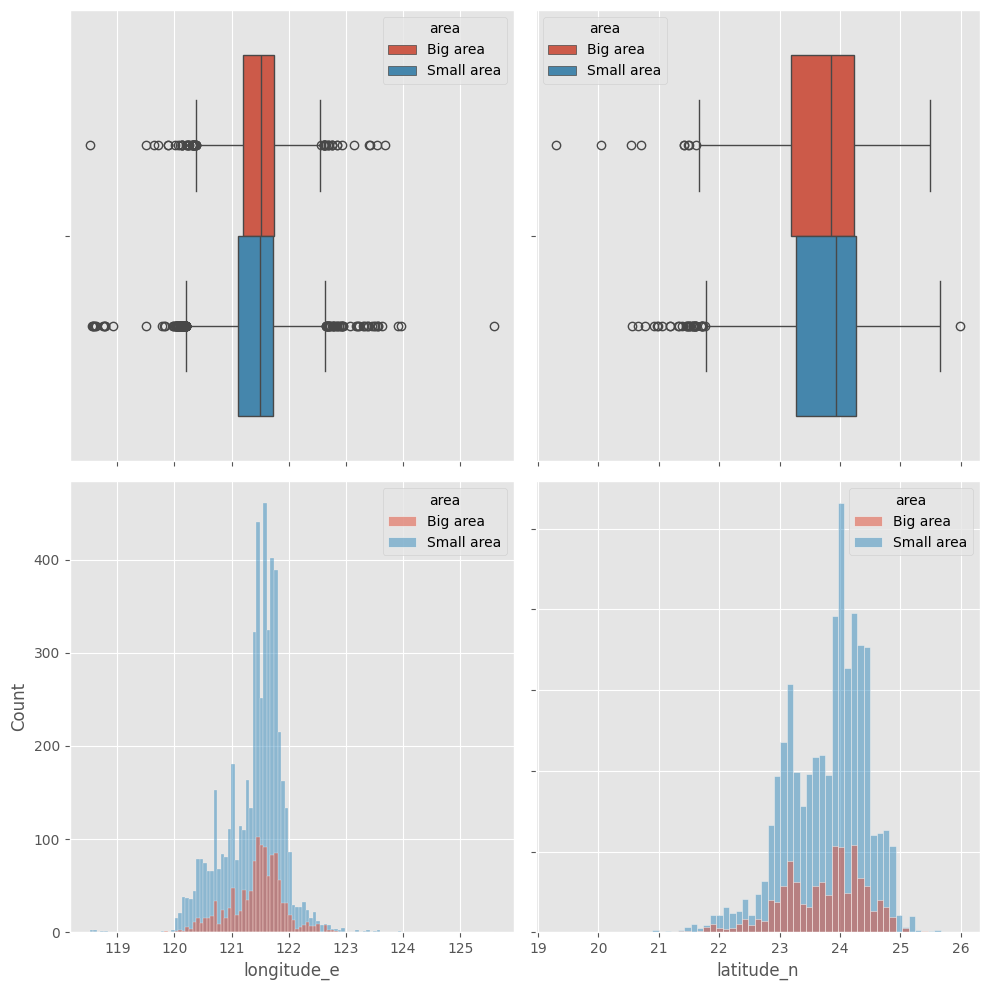

In [14]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=df['longitude_e'], ax=ax[0,0], hue=df['area'])


sns.boxplot(x=df['latitude_n'], ax = ax[0,1], hue=df['area'])
sns.histplot(x=df['longitude_e'], ax = ax[1,0], hue=df['area'])
sns.histplot(x=df['latitude_n'],ax = ax[1,1], hue=df['area'])
for ax in fig.get_axes():
    ax.label_outer()
plt.tight_layout()
plt.show()


Let's see how do these variables look like if we only exclude all the local earthquakes. 

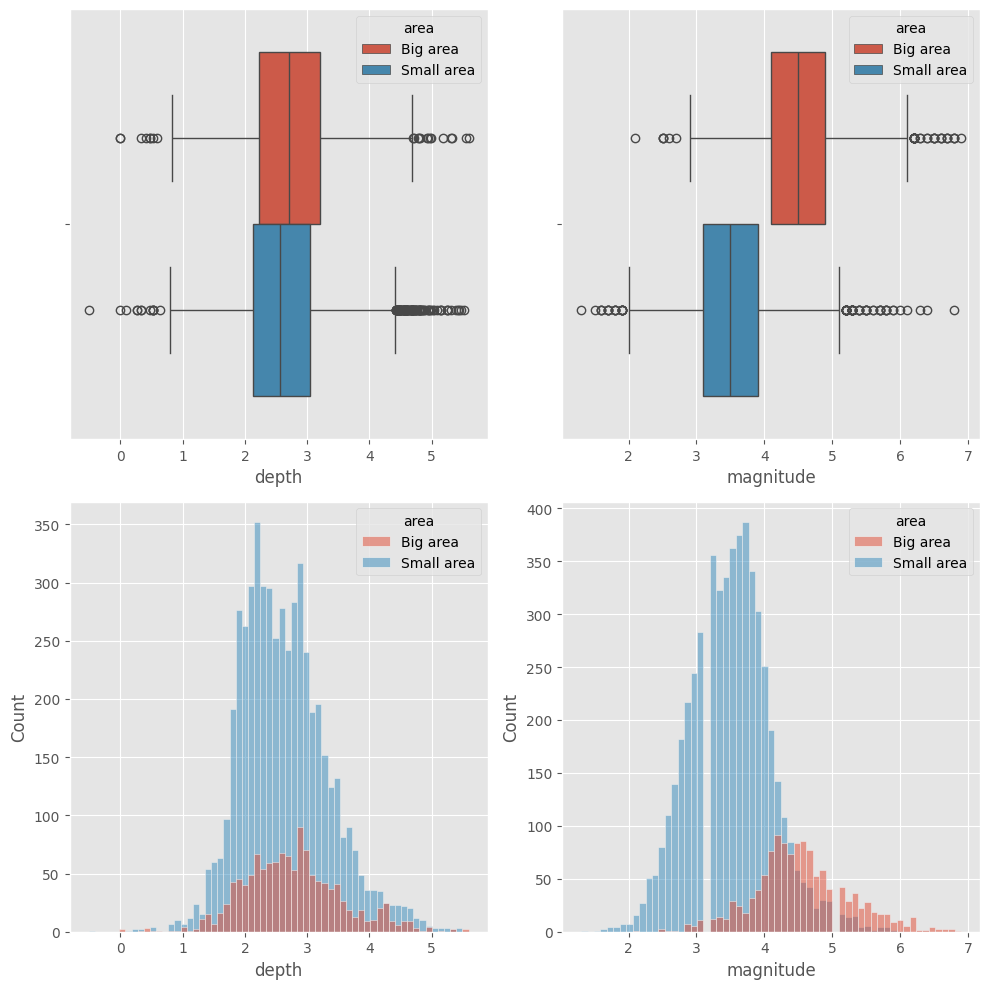

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=np.log(df['depth']), ax = ax[0,0], hue=df['area'])
sns.boxplot(x=df['magnitude'], ax = ax[0,1], hue=df['area'])
sns.histplot(x=np.log(df['depth']), ax = ax[1,0], hue=df['area'])
sns.histplot(x=df['magnitude'],ax = ax[1,1], hue=df['area'])

plt.tight_layout()

### 1.2 Distribution by county

In [16]:
#Extract the county from the loc_ful column

df['county'] = df['loc_name'].str.split(' ').apply(lambda x: x[-2])


In [17]:
# Add a region column 
def region(x):
    if x in ['Yilan', 'Hualien', 'Taitung']:
        return 'East'
    elif x in [ 'Taipei', 'Taoyuan', 'Keelung', 'Hsinchu']:
        return 'North'
    elif x in [ 'Taichung', 'Changhua', 'Nantou', 'Chiayi', 'Yunlin' ]:
        return 'Center'
    elif x in ['Kaohsiung', 'Tainan', 'Pintung']:
        return 'South'
    else :
        return 'Islands'
    
df['region'] = df['county'].apply(region)

In [18]:
df['region'].value_counts()

region
East       5186
Center      696
South       335
Islands     165
North       161
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

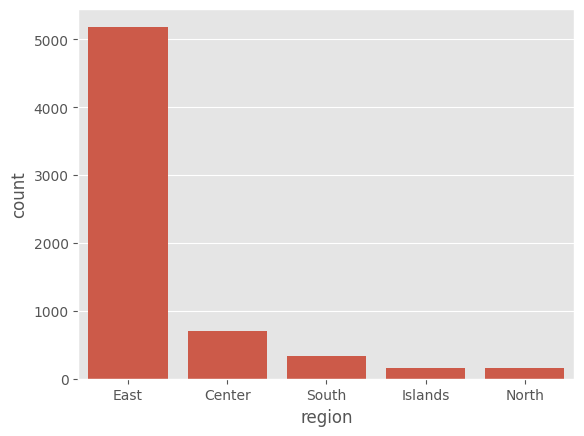

In [19]:
sns.barplot(data=df['region'].value_counts())

In [20]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False).index.to_list()

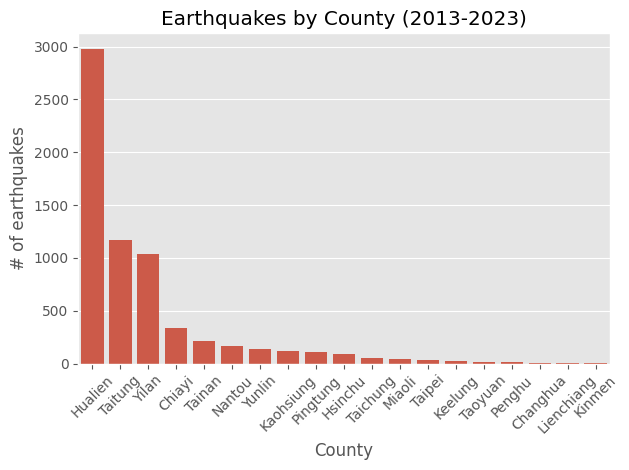

In [21]:
counties = df['county'].groupby(df['county']).count().sort_values(ascending=False)
sns.barplot(data=counties)

plt.xticks(rotation=45)
plt.ylabel('# of earthquakes')
plt.xlabel('County')
plt.title('Earthquakes by County (2013-2023)')
plt.tight_layout()
plt.show()

### 1.3 Magnitude difference


The dataset makes a difference between small and big area earthquakes. I'll look into their distributions to see if indeed they are fundamentally different phenomenons. The above boxplots show that they may be two distinct distributions with different mean and variance.

In [22]:
factor_b = df['area'].value_counts()[1]/df.shape[0]
factor_s = df['area'].value_counts()[0]/df.shape[0]

/tmp/ipykernel_24143/1504373096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_b = df['area'].value_counts()[1]/df.shape[0]
/tmp/ipykernel_24143/1504373096.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor_s = df['area'].value_counts()[0]/df.shape[0]


In [23]:
mu_s, std_s = norm.fit(df[df['number']=='Small area']['magnitude'])
mu_s, std_s

mu_b, std_b = norm.fit(df[df['number']!='Small area']['magnitude'])
mu_b, std_b

print('Small area earthquakes average magnitude of {} with standard deviation of {}'.format(round(mu_s,2), round(std_s,2)))
print('Big area earthquakes average magnitude of {} with standard deviation of {}'.format(round(mu_b,2), round(std_b,2)))

Small area earthquakes average magnitude of 3.51 with standard deviation of 0.6
Big area earthquakes average magnitude of 4.55 with standard deviation of 0.71


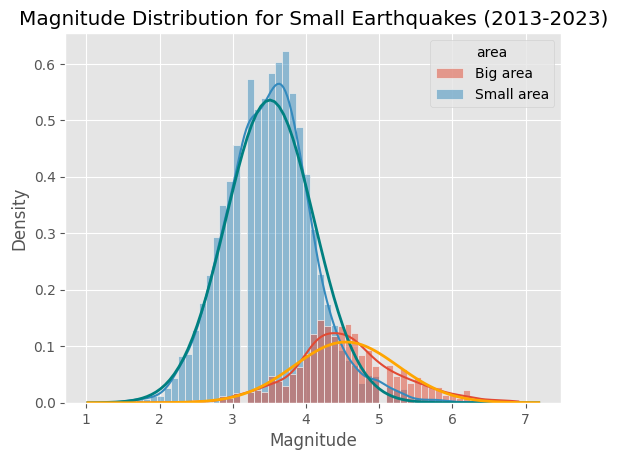

In [24]:
ax = sns.histplot(data=df, x='magnitude',kde=True, stat='density', hue='area')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_s, std_s)*factor_s
q = norm.pdf(x, mu_b, std_b)*factor_b
plt.plot(x, p,linewidth=2 ,color = 'teal')
plt.plot(x, q, linewidth=2, color = 'orange')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Magnitude Distribution for Small Earthquakes (2013-2023)')
plt.show()

In [25]:
df_s = df[df['area'] == 'Big area'].drop('area', axis=1)
df_b = df[df['area'] == 'Small area'].drop('area', axis=1)

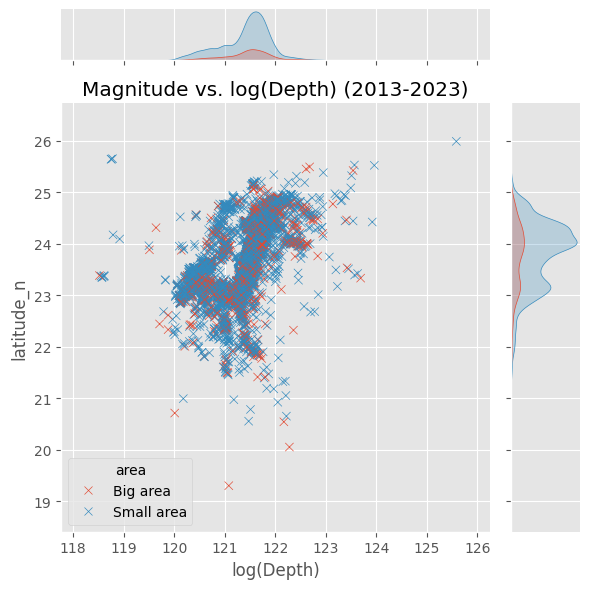

In [26]:
sns.jointplot(
    x=df['longitude_e'], 
    y=df['latitude_n'], 
    marker='x', 
    hue= df['area'],
    kind='scatter',
    marginal_kws={'color':'teal'})

plt.title('Magnitude vs. log(Depth) (2013-2023)')
plt.xlabel('log(Depth)')
plt.tight_layout()
plt.show()

This representation shows that both earthquake distributions are spatially overlapped. The scatterplot resembles the actual map of Taiwan. The next graph shows the earthquakes on the map. 

In [51]:
fig = px.density_mapbox(df, lat='latitude_n', lon='longitude_e', z='magnitude', radius=5, center=dict(lat=23.5, lon=121.5), zoom=6.5, height=800, mapbox_style="open-street-map", hover_data=['latitude_n', 'longitude_e', 'magnitude'])
fig.update_layout(title='Earthquakes in Taiwan (2013-2023)')
fig.show()

### 1.4 Seismic center

I will define *seismic senter* as the average location of all the earthquakes in that year. Knowing that the magnitude scale used is logarithmic (one point increase in magnitude implies 10 times more energy released), the average will be weighted by the exponential of the magnitude. 

In [27]:
def w_average(df, variable, column):
    w_avg_lat = []
    
    for i in range(2013, 2024, 1):
        weight_list = np.exp(df[df['year'] == i][column])
        w_avg_lat.append(np.average(df[df['year'] == i][variable], weights=weight_list))

    return w_avg_lat

In [28]:
center_s_lat = w_average(df_s, 'latitude_n', 'magnitude')
center_s_lon = w_average(df_s, 'longitude_e', 'magnitude')

center_b_lat = w_average(df_b, 'latitude_n', 'magnitude')
center_b_lon = w_average(df_b, 'longitude_e', 'magnitude')

year = list(range(2013, 2024))

#### 1.4.1 Seismic center drift

In [29]:
centers = pd.DataFrame({'year': year, 'center_s_lat': center_s_lat, 'center_s_lon': center_s_lon, 'center_b_lat': center_b_lat, 'center_b_lon': center_b_lon})
centers

,year,center_s_lat,center_s_lon,center_b_lat,center_b_lon
0,2013,23.733551,121.717233,23.806294,121.462078
1,2014,23.856496,121.613969,23.788661,121.644399
2,2015,23.868615,121.757417,23.960147,121.651654
3,2016,23.925884,121.739350,23.687540,121.471307
4,2017,23.475459,121.277523,23.658891,121.370151
5,2018,23.904660,121.483051,23.806083,121.511691
6,2019,23.627331,121.581374,23.861930,121.476852
7,2020,23.608744,121.615276,23.608672,121.447356
8,2021,23.848732,121.645595,23.713271,121.584031
9,2022,23.329544,121.412291,23.583784,121.616836


In [30]:
#save centers as a csv file
centers.to_csv('centers.csv')

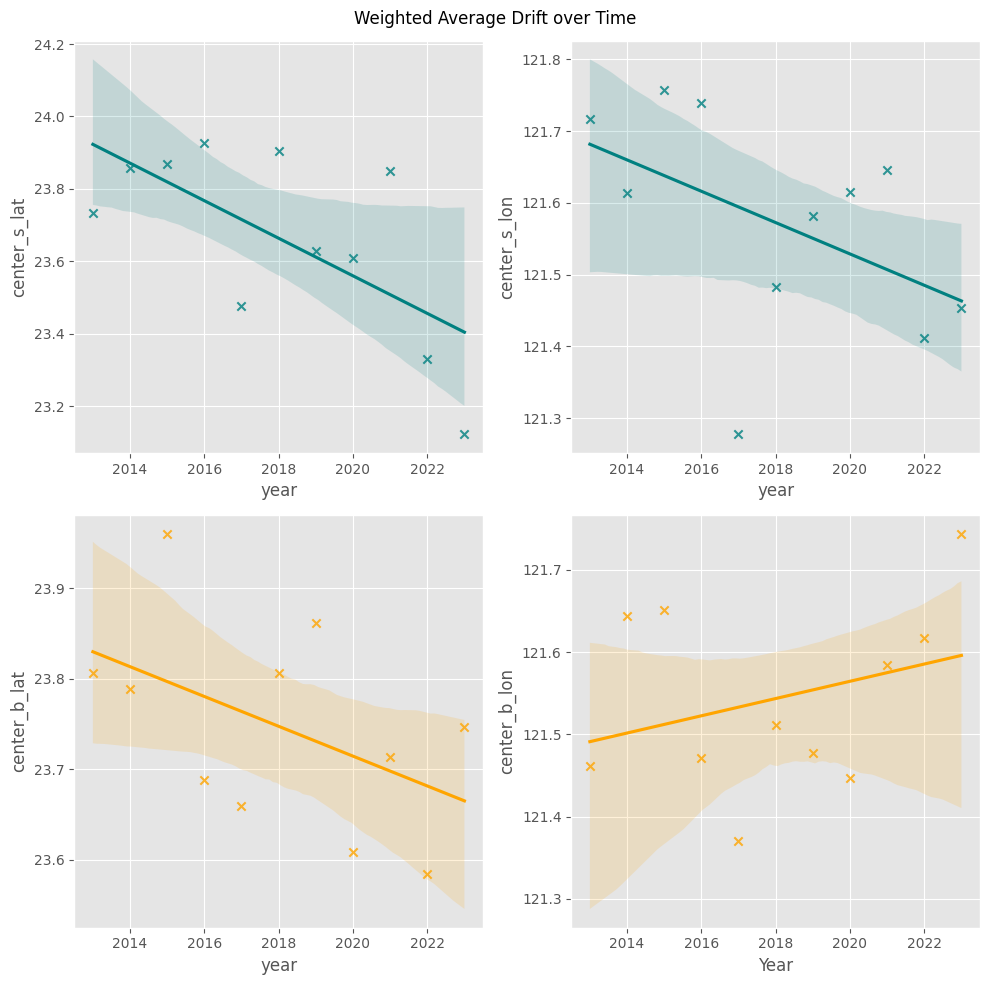

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.regplot(data=centers, x='year', y='center_s_lat', marker='x', color='teal', ax=ax[0,0])

sns.regplot(data= centers, x='year', y='center_s_lon', marker='x', color='teal', ax=ax[0,1])

sns.regplot(data=centers, x='year', y='center_b_lat', marker='x', color='orange', ax=ax[1,0])

sns.regplot(data= centers, x='year', y='center_b_lon', marker='x', color='orange', ax=ax[1,1])


plt.suptitle('Weighted Average Drift over Time')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [62]:
#make a plotly map graph with the center dataframe having different colors for each year value
fig = px.line_mapbox(centers, lat='center_s_lat', lon='center_s_lon', zoom=7.5, height=800, mapbox_style="open-street-map", hover_data=['year'])
fig.update_layout(title='Weighted Average Drift in Center Area (2013-2023)')

#### 1.4.2 Is this drift due to chance?

The following calculation aims to identify the nature of the apparent southward drift of the seismic center. 

In [68]:
formula = 'center_s_lat ~ year'
model = ols(formula=formula, data=centers).fit()
model_results = model.summary()

model_results

/home/hugo/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           center_s_lat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6.767
Date:                Fri, 01 Mar 2024   Prob (F-statistic):             0.0287
Time:                        10:41:34   Log-Likelihood:                 2.7113
No. Observations:                  11   AIC:                            -1.423
Df Residuals:                       9   BIC:                           -0.6268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3064     40.227      3.190      0.011      37.307     219.306
year          -0.0519      0.020     -2.601      0.029      -0.097      -0.007
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.479
Skew:                           0.169   Prob(JB):                        0.787
Kurtosis:                       2.035   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This means that the southward shift could be roughly modeled by the following function: 

$$
\text{Latitude} = 128.3064 - 0.0519 \cdot \text{Year}
$$

In other words, every year the average latitude decreases by 0.0519 degrees for the period of time contained in the dataset. 

#### 1.4.3 Verify Model Assumptions

For this model to have any validity at all there are few assumptions that have to be met by the dataset. 

The first of this assumptions is the linearity of the relationship between the variables. This seems to be met as shown in the avobe Weighed Average Drift over Time plots. 

The second assumption is that the observations are independent from each other. For this I'm going to assume that all the entries in the earthquake dataset belong to different earthquakes. This may be wrong for a small sample of the bigger earthquakes that may trigger smaller replicas, but the likelihood of these events decreases with magnitude and so this assumption may not be too misguided. The weighted average of all the quakes in a year is supposed to be independent from the weighted average for subsequent years, and so this assumption is met. 

The next steps are to verify the normality of the residuals. The QQ plot is a good way to verify this.

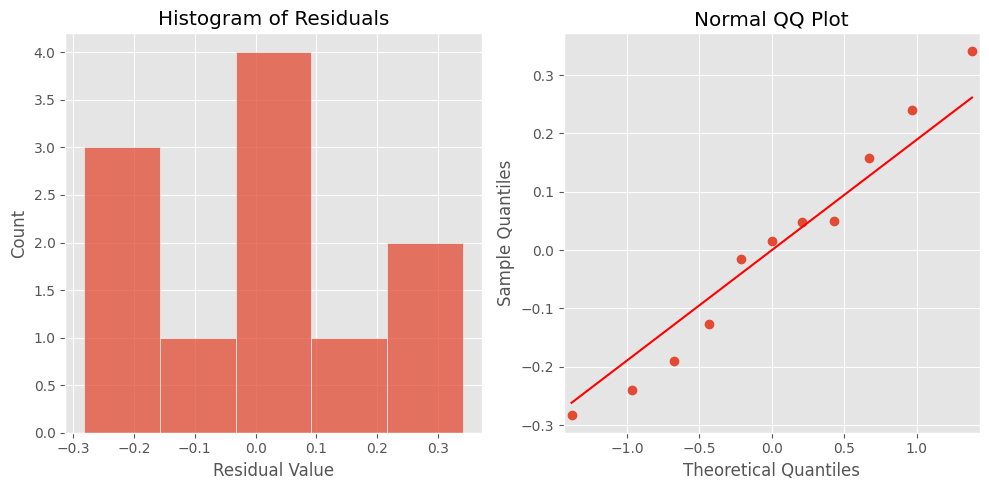

In [71]:
residuals = model.resid

fig,axes  = plt.subplots(1,2, figsize=(10,5))

sns.histplot(residuals, ax=axes[0], bins=5)

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

The odd looking histogram on the left is an artifact of the low number of observations. Nevertheless the QQ plot confirms the absence of a particular trend in the residuals. The normality assumption is met as well. 


Lastly is the homoscedasticity or constant variance assumption. This can be checked in the following plot.

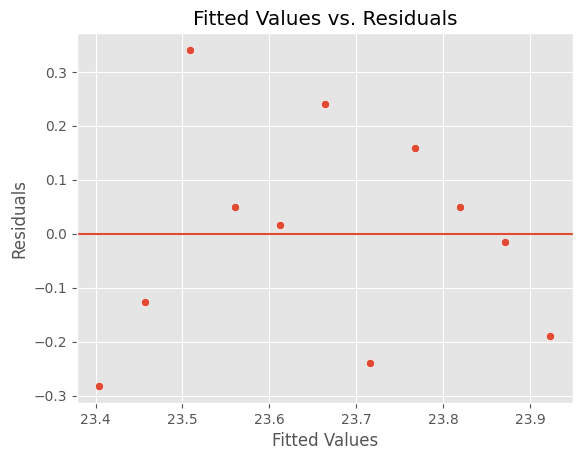

In [74]:
fig = sns.scatterplot(x=model.fittedvalues, y=residuals)

fig.set_xlabel('Fitted Values')

fig.set_ylabel('Residuals')

fig.set_title('Fitted Values vs. Residuals')

fig.axhline(0)

plt.show()

Again, the low number of observations in this center dataset makes this graph not very straightforward. One can see that negative residuals tend to happen in the extremes of the x-axis range. This may mean that the variance is dependant on the independent variable and therefore invalidating this assumption. 
Because the overall variance is contained within a symmetric range [-0.3,0.3], and roughly half of the observations fall on each side of the `y=0` axis, I will assume that the assumption is met.

#### 1.4.4 Conclusion

Let's look again at the model summary for the seismic center drift.


In [75]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           center_s_lat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     6.767
Date:                Fri, 01 Mar 2024   Prob (F-statistic):             0.0287
Time:                        10:41:34   Log-Likelihood:                 2.7113
No. Observations:                  11   AIC:                            -1.423
Df Residuals:                       9   BIC:                           -0.6268
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.3064     40.227      3.190      0.011      37.307     219.306
year          -0.0519      0.020     -2.601      0.029      -0.097      -0.007
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.479
Skew:                           0.169   Prob(JB):                        0.787
Kurtosis:                       2.035   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using time as an independent variable, this model is able to explain $ 42.9 \% $ of the variation in latitude. The p-values of the coefficients are $0.011$ for the intercept (cross on the y-axis), and $0.029$ for the slope. Both of these values are smaller than the standard statistical significance level of $0.05$. Thus we can reject the null hypothesis and conclude that the drift **isn't due to chance**. 

### 1.5 Relationship between depth and magnitude

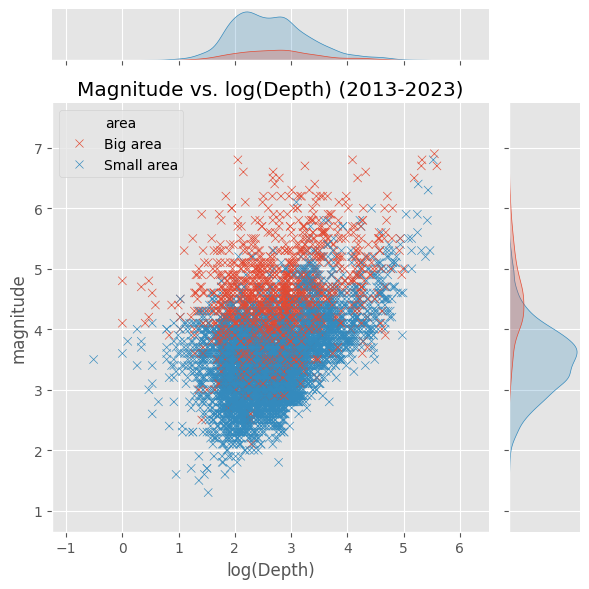

In [33]:
sns.jointplot(
    x=np.log(df['depth']), 
    y=df['magnitude'], 
    marker='x', 
    hue= df['area'],
    kind='scatter',
    marginal_kws={'color':'teal'})

plt.title('Magnitude vs. log(Depth) (2013-2023)')
plt.xlabel('log(Depth)')
plt.tight_layout()
plt.show()

### Yearly distribution of earthquakes

/tmp/ipykernel_24143/449440525.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[df['magnitude'] >= mu_s]['date'].dt.year, bins=11, multiple='stack', palette='viridis')


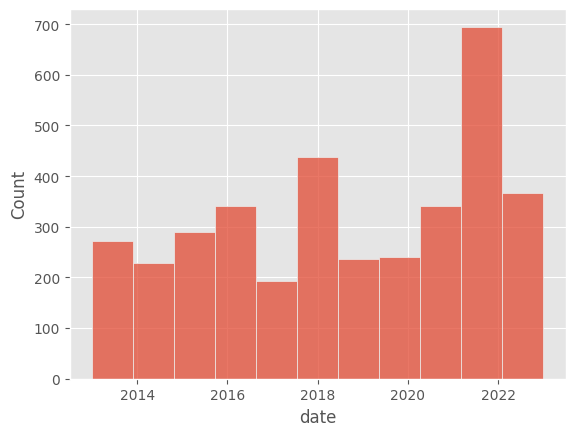

In [34]:
sns.histplot(x=df[df['magnitude'] >= mu_s]['date'].dt.year, bins=11, multiple='stack', palette='viridis')
plt.show()